<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Gender              5000 non-null   int64  
 2   Driving_Experience  5000 non-null   int64  
 3   Vehicle_Type        5000 non-null   int64  
 4   Previous_Accidents  5000 non-null   int64  
 5   Region              5000 non-null   int64  
 6   Annual_Mileage      5000 non-null   float64
 7   Premium             5000 non-null   float64
 8   Accident            5000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 351.7 KB


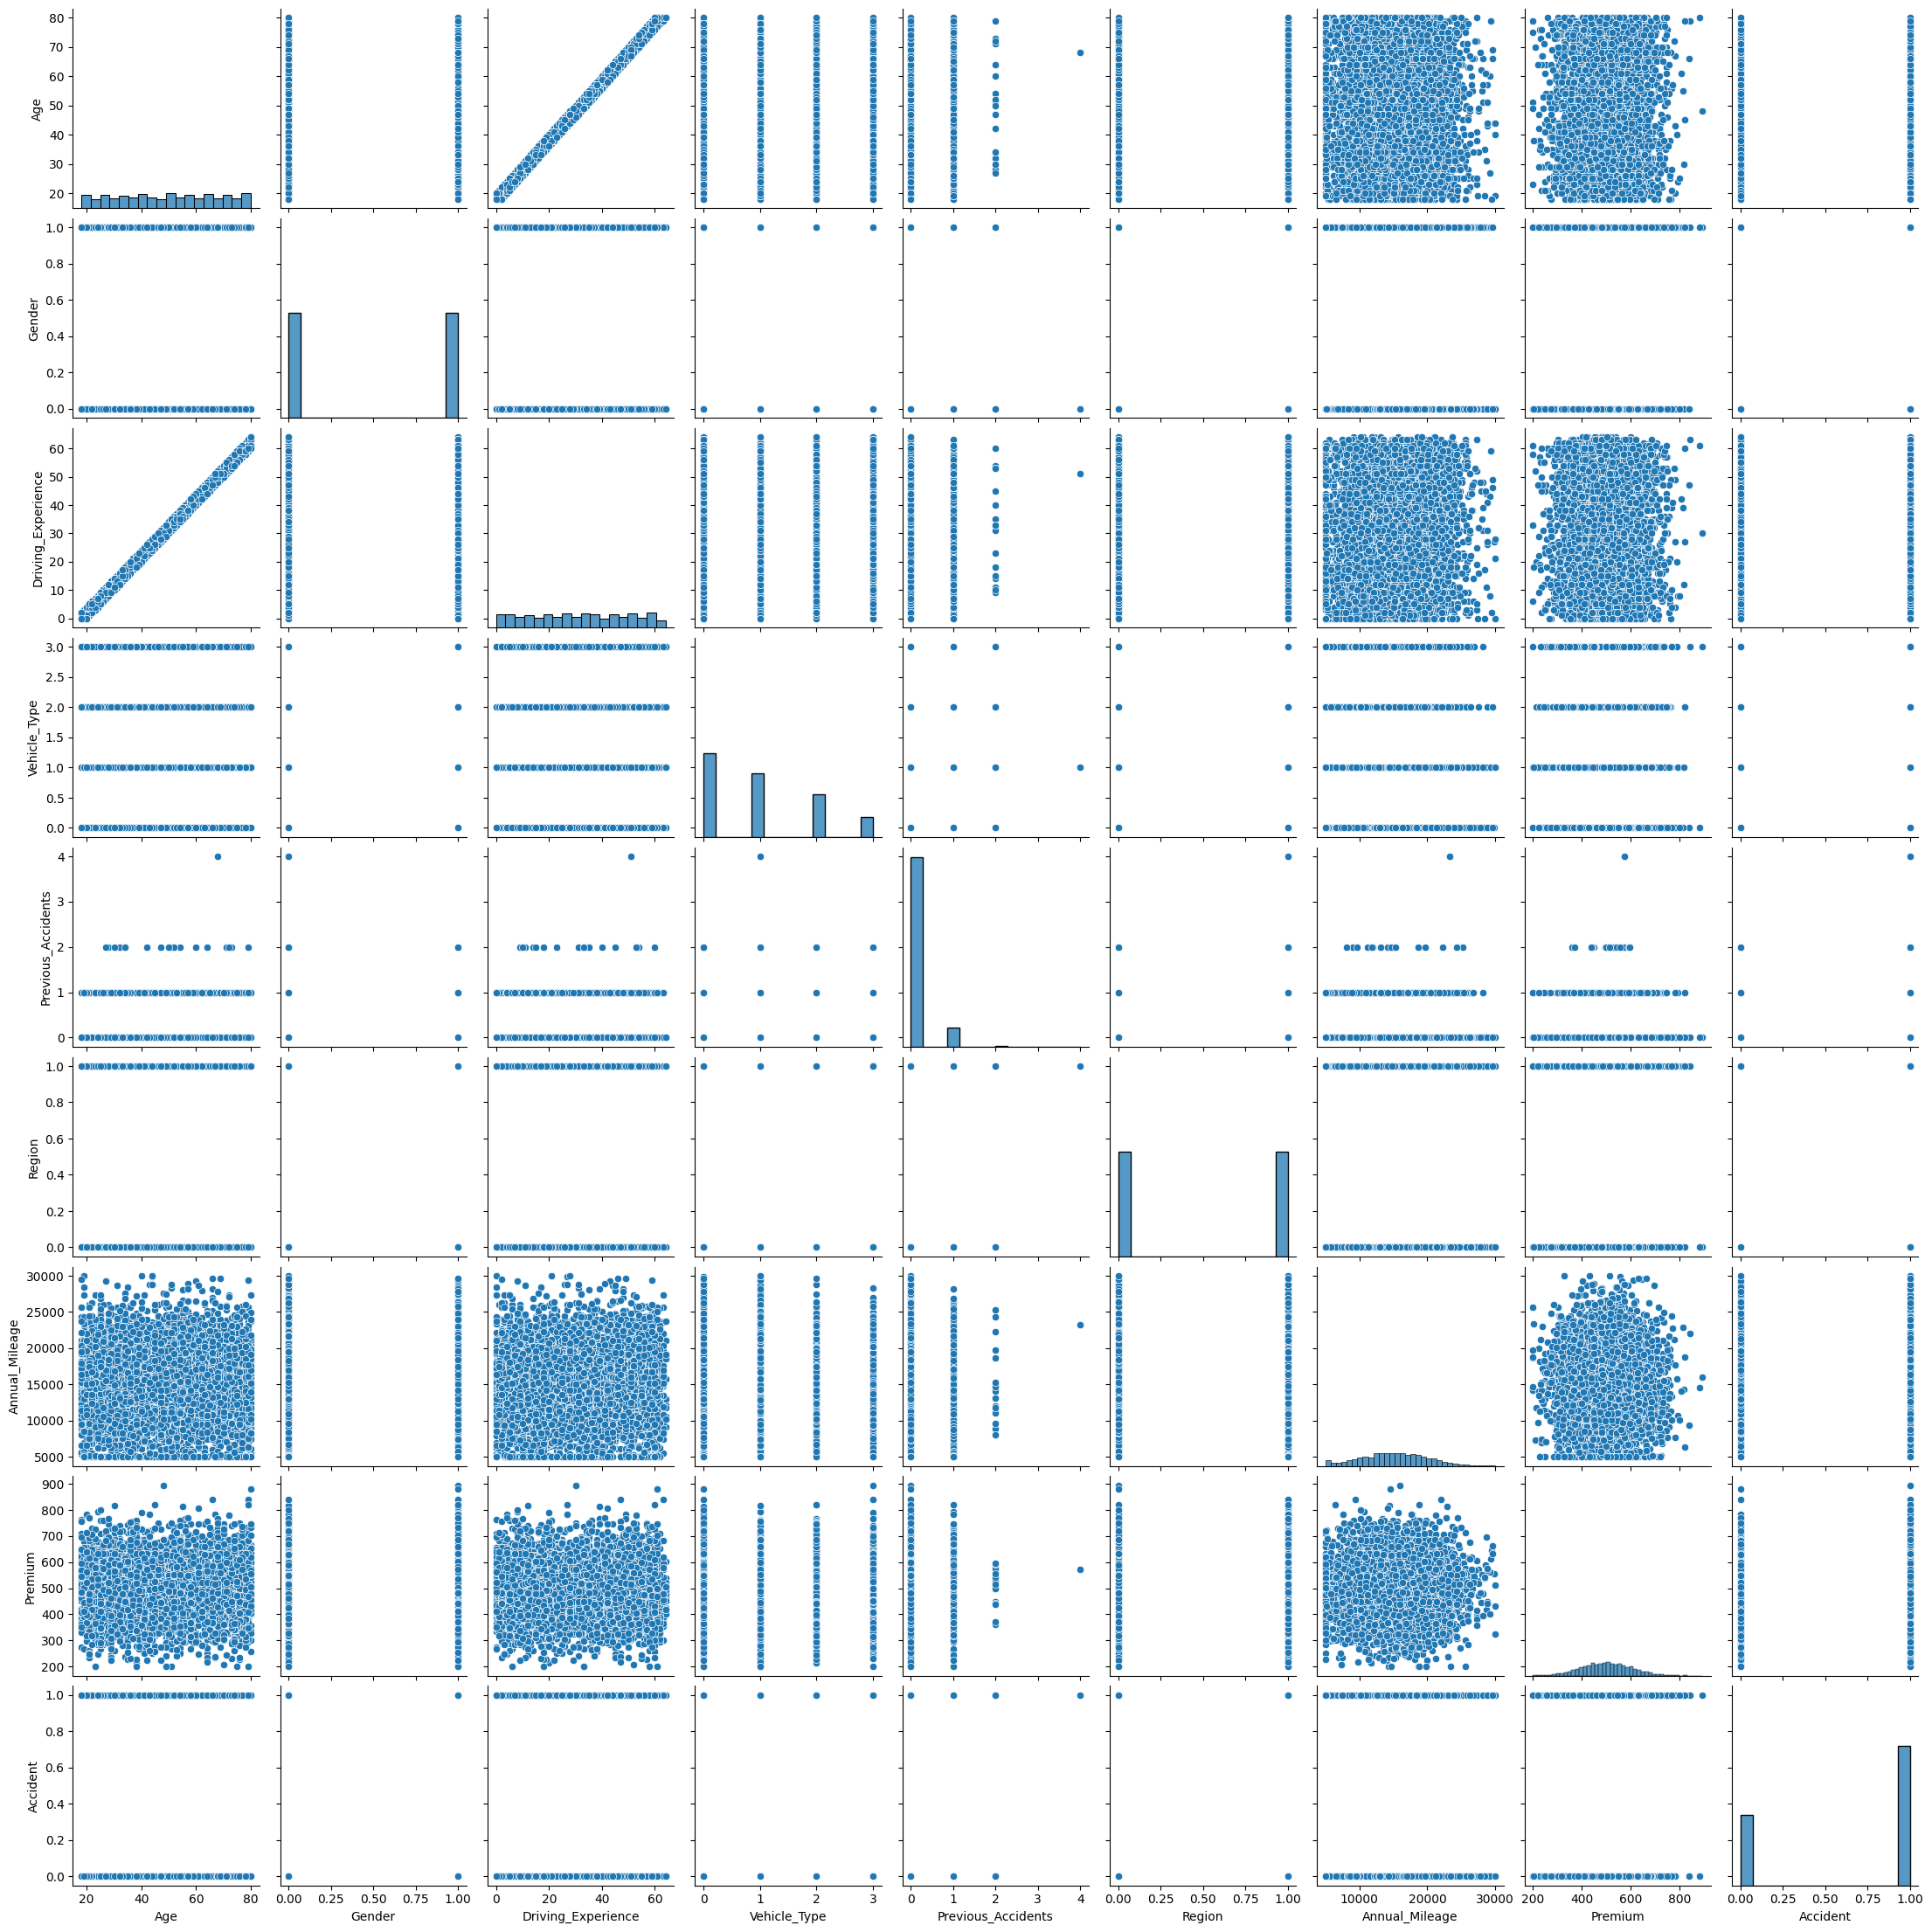

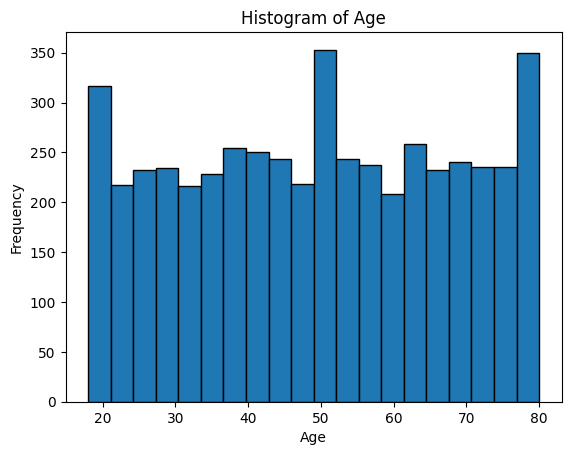

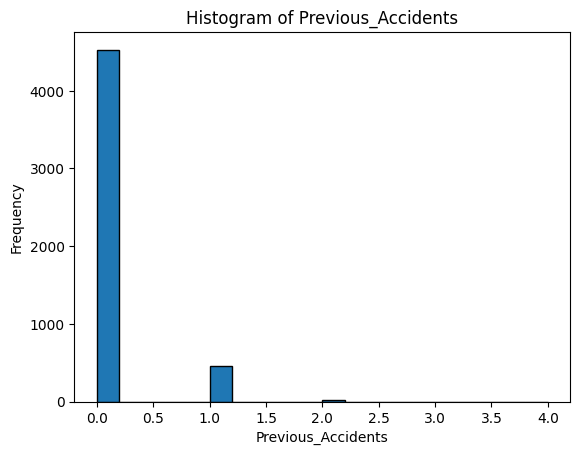

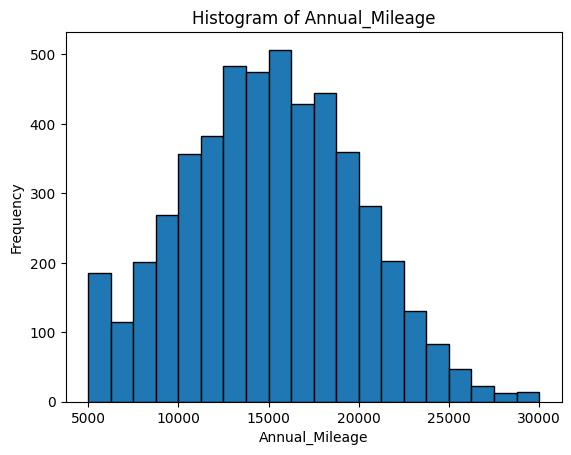

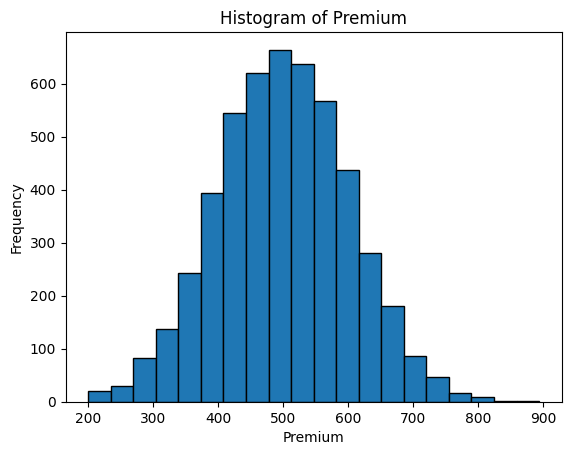

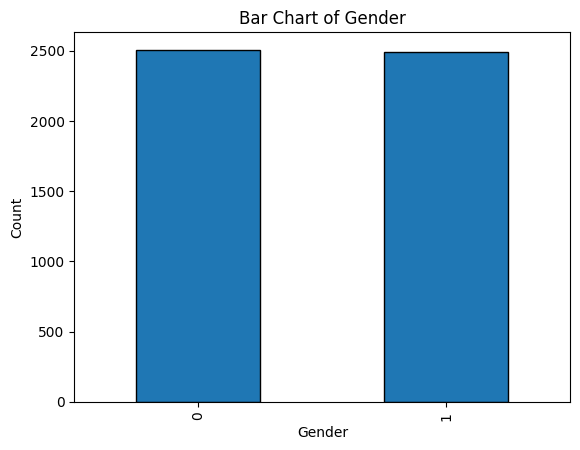

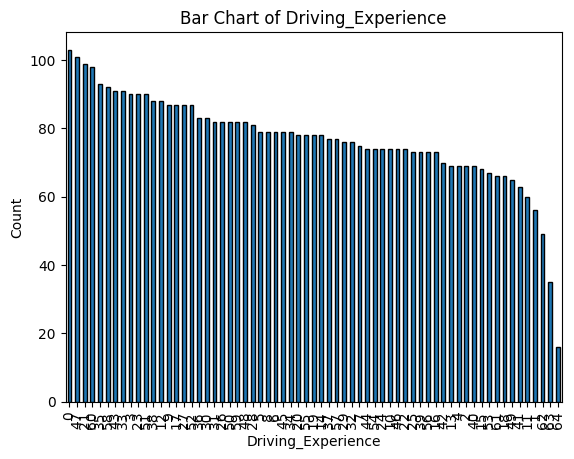

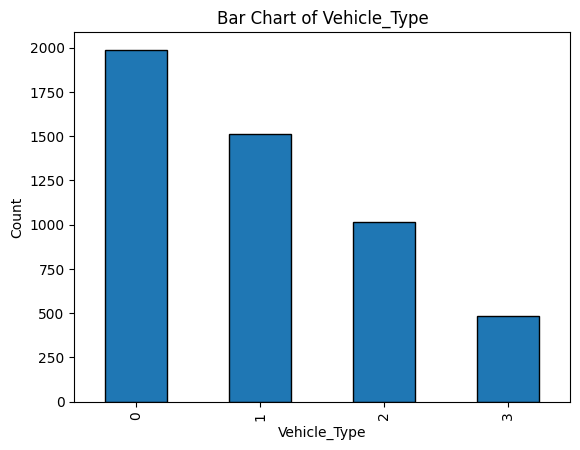

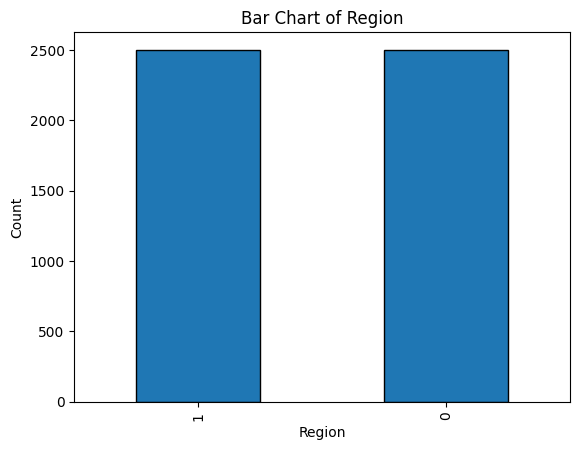

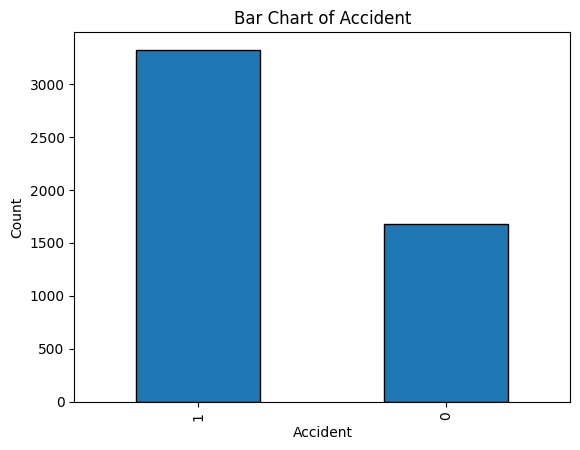

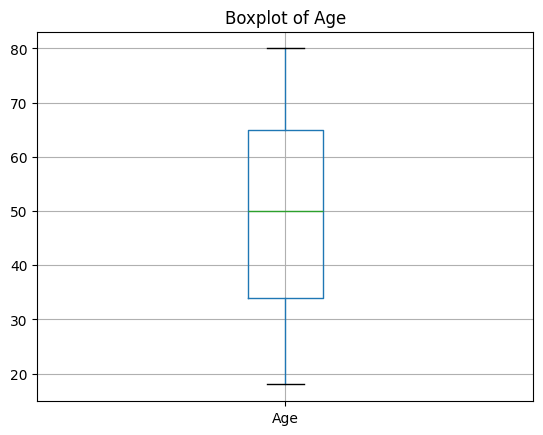

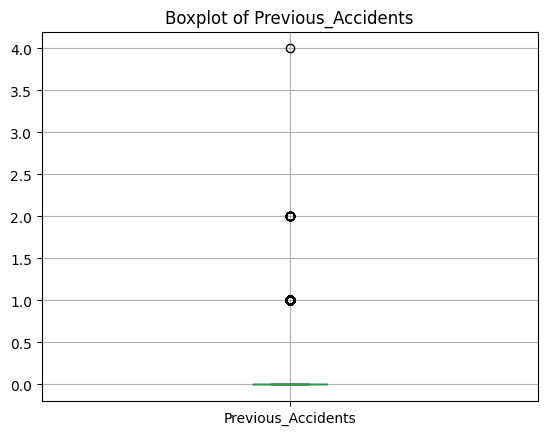

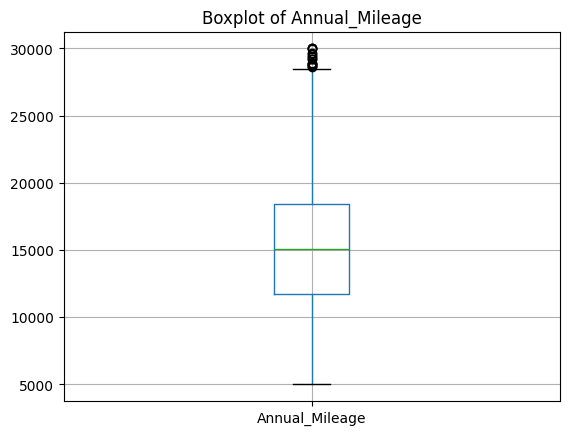

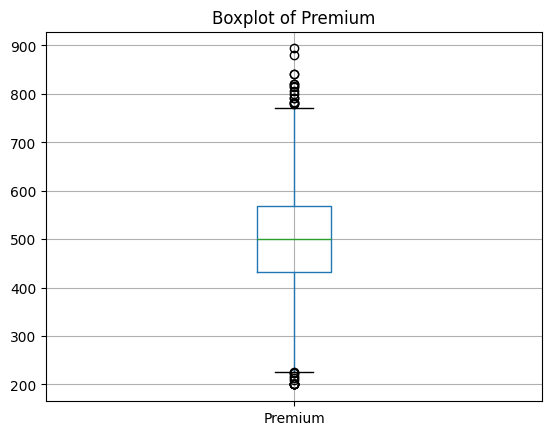

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

%matplotlib inline

# Daten laden
data = pd.read_csv('../data/raw/insurance_data.csv')
data.head()
data.info()
data.describe()
data.isnull().sum()

# Daten visualisieren
sns.pairplot(data)
plt.show()

#Identify numerical and categorical columns
numerical_columns = ['Age', 'Previous_Accidents', 'Annual_Mileage', 'Premium']
categorical_columns = ['Gender', 'Driving_Experience', 'Vehicle_Type', 'Region', 'Accident']

# Creating histograms for numerical variables
for col in numerical_columns:
    plt.figure()
    plt.hist(data[col], bins=20, edgecolor='k')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Creating bar charts for categorical variables
for col in categorical_columns:
    plt.figure()
    data[col].value_counts().plot(kind='bar', edgecolor='k')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Identifying outliers using Z-score and Boxplots for numerical variables
outlier_threshold = 3  # Common threshold for Z-score method
outliers = {}

# Detecting outliers using Z-score for numerical columns
for col in numerical_columns:
    z_scores = zscore(data[col])
    outliers[col] = data[(np.abs(z_scores) > outlier_threshold)].index.tolist()
    
    # Displaying boxplot to visualize outliers
    plt.figure()
    data.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

# Handling Outliers: Removing rows with extreme Z-score outliers
for col, outlier_indices in outliers.items():
    df = data.drop(index=outlier_indices)

# Converting categorical variables to category datatype
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Saving the cleaned dataset
output_path = "../data/processed/cleaned_insurance_data.csv"
df.to_csv(output_path, index=False)    